In [1]:

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

Загрузили библиотеки.
Для корректной работы с данными в python требуется загрузить специальную библиотеку pandas, программную библиотеку на языке python для обработки и анализа данных.

In [2]:
import pandas as pd # загружаем библиотеку и для простоты обращения в коде называем её сокращенно pd


Для корректной работы с графиками в python требуется загрузить специальную библиотеку matplotlib, программную библиотеку на языке python для визуализации данных двумерной и трехмерной графикой.

In [3]:
import matplotlib.pyplot as plt # загружаем библиотеку и для простоты обращения в коде называем её сокращенно plt
# указываем, чтобы картинки отображались прямо в ноутбуке
%matplotlib inline

Загрузим данные.

In [9]:
%%capture
!wget https://www.dropbox.com/s/afwb0tnqm9izxha/predict_house_price_training_data.xlsx
!wget https://www.dropbox.com/s/sur2avqf4n5f4az/predict_house_price_test_data.xlsx

In [10]:
training_data = pd.read_excel('predict_house_price_training_data.xlsx') # загружаем таблицу в переменную training_data

In [11]:
training_data.head()

,Целевая.Цена,Спальни,Ванные,Жилая площадь,Общая площадь,Количество этажей,Вид на воду,Просмотрены ранее,Состояние,Оценка риелтора,Площадь без подвала,Площадь подвала,Год постройки,Год реновации,Широта,Долгота
0,830000,5,3.50,3490,21780,2.0,0,0,3,8,3490,0,1996,0,47.6707,-122.144
1,385000,4,1.75,2360,7620,1.0,0,0,4,7,1180,1180,1955,0,47.5278,-122.345
2,610000,6,2.75,2040,8560,1.0,0,2,4,7,1100,940,1961,0,47.6160,-122.115
3,550000,3,1.75,1940,8376,1.0,0,0,4,8,1290,650,1963,0,47.5586,-122.173
4,1300000,3,2.75,3450,5350,1.5,0,3,4,9,2590,860,1925,0,47.6389,-122.407


Обрабатываем данные перед обучением модели.

In [12]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15129 entries, 0 to 15128
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Целевая.Цена         15129 non-null  int64  
 1   Спальни              15129 non-null  int64  
 2   Ванные               15129 non-null  float64
 3   Жилая площадь        15129 non-null  int64  
 4   Общая площадь        15129 non-null  int64  
 5   Количество этажей    15129 non-null  float64
 6   Вид на воду          15129 non-null  int64  
 7   Просмотрены ранее    15129 non-null  int64  
 8   Состояние            15129 non-null  int64  
 9   Оценка риелтора      15129 non-null  int64  
 10  Площадь без подвала  15129 non-null  int64  
 11  Площадь подвала      15129 non-null  int64  
 12  Год постройки        15129 non-null  int64  
 13  Год реновации        15129 non-null  int64  
 14  Широта               15129 non-null  float64
 15  Долгота              15129 non-null 

In [13]:
training_values = training_data['Целевая.Цена']

In [14]:
training_points = training_data.drop('Целевая.Цена', axis=1)

In [15]:
training_points.head()

,Спальни,Ванные,Жилая площадь,Общая площадь,Количество этажей,Вид на воду,Просмотрены ранее,Состояние,Оценка риелтора,Площадь без подвала,Площадь подвала,Год постройки,Год реновации,Широта,Долгота
0,5,3.50,3490,21780,2.0,0,0,3,8,3490,0,1996,0,47.6707,-122.144
1,4,1.75,2360,7620,1.0,0,0,4,7,1180,1180,1955,0,47.5278,-122.345
2,6,2.75,2040,8560,1.0,0,2,4,7,1100,940,1961,0,47.6160,-122.115
3,3,1.75,1940,8376,1.0,0,0,4,8,1290,650,1963,0,47.5586,-122.173
4,3,2.75,3450,5350,1.5,0,3,4,9,2590,860,1925,0,47.6389,-122.407


In [16]:
training_points.shape

(15129, 15)

Обучаем модель на обучающий выборке.

In [17]:
from sklearn import linear_model

In [18]:
linear_regression_model = linear_model.LinearRegression() # создаем модель

Обучить модель.

In [19]:
linear_regression_model.fit(training_points, training_values)

LinearRegression()

Загружаем и предобрабатываем данные для тестирования.

In [31]:
test_data = pd.read_excel('predict_house_price_test_data.xlsx')

In [33]:
test_data.head()

,Целевая.Цена,Спальни,Ванные,Жилая площадь,Общая площадь,Количество этажей,Вид на воду,Просмотрены ранее,Состояние,Оценка риелтора,Площадь без подвала,Площадь подвала,Год постройки,Год реновации,Широта,Долгота
0,260000,3,1.00,1300,10139,1.0,0,0,3,7,1300,0,1962,2007,47.3427,-122.087
1,734500,4,2.75,3280,6845,2.0,0,0,3,10,3280,0,2003,0,47.7042,-122.107
2,325000,1,1.00,1220,12426,1.0,0,4,4,6,1220,0,1946,0,47.4047,-122.331
3,1990000,3,2.50,2880,13500,1.0,0,4,5,8,1520,1360,1950,0,47.6281,-122.216
4,315000,3,2.00,1300,3731,1.0,0,0,3,7,900,400,1993,0,47.5374,-122.270


In [34]:
test_data.shape

(6484, 16)

Проверим, есть ли в данных пропуски. Для того чтобы это сделать, нужно обратиться вызвать у переменной test_data метод info().

In [35]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6484 entries, 0 to 6483
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Целевая.Цена         6484 non-null   int64  
 1   Спальни              6484 non-null   int64  
 2   Ванные               6484 non-null   float64
 3   Жилая площадь        6484 non-null   int64  
 4   Общая площадь        6484 non-null   int64  
 5   Количество этажей    6484 non-null   float64
 6   Вид на воду          6484 non-null   int64  
 7   Просмотрены ранее    6484 non-null   int64  
 8   Состояние            6484 non-null   int64  
 9   Оценка риелтора      6484 non-null   int64  
 10  Площадь без подвала  6484 non-null   int64  
 11  Площадь подвала      6484 non-null   int64  
 12  Год постройки        6484 non-null   int64  
 13  Год реновации        6484 non-null   int64  
 14  Широта               6484 non-null   float64
 15  Долгота              6484 non-null   f

Отделяем целевую переменную.

In [36]:
test_values = test_data['Целевая.Цена']

In [37]:
test_points = test_data.drop('Целевая.Цена', axis=1)

И проверяем результат записанный в test_points.

In [38]:
test_points.head()

,Спальни,Ванные,Жилая площадь,Общая площадь,Количество этажей,Вид на воду,Просмотрены ранее,Состояние,Оценка риелтора,Площадь без подвала,Площадь подвала,Год постройки,Год реновации,Широта,Долгота
0,3,1.00,1300,10139,1.0,0,0,3,7,1300,0,1962,2007,47.3427,-122.087
1,4,2.75,3280,6845,2.0,0,0,3,10,3280,0,2003,0,47.7042,-122.107
2,1,1.00,1220,12426,1.0,0,4,4,6,1220,0,1946,0,47.4047,-122.331
3,3,2.50,2880,13500,1.0,0,4,5,8,1520,1360,1950,0,47.6281,-122.216
4,3,2.00,1300,3731,1.0,0,0,3,7,900,400,1993,0,47.5374,-122.270


In [39]:
test_points.shape

(6484, 15)

Провалидируем модель на тестовой выборке.

In [40]:
test_predictions_linear = linear_regression_model.predict(test_points)

Визуализируем прогноз линейной модели и настоящие значения из тестовой выборки.

In [41]:
%matplotlib inline

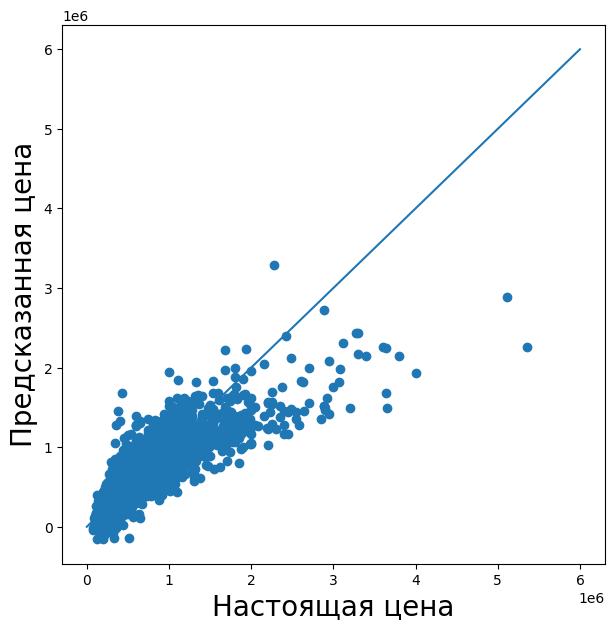

In [42]:
plt.figure(figsize=(7, 7))
plt.scatter(test_values, test_predictions_linear) # рисуем точки, соответствущие парам настоящее значение - прогноз
plt.plot([0, 6 * 10**6], [0, 6 * 10**6]) # рисуем прямую, на которой предсказания и настоящие значения совпадают
plt.xlabel('Настоящая цена', fontsize=20)
plt.ylabel('Предсказанная цена', fontsize=20);

In [43]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

Подсчитаем ошибки для линейной модели.

In [44]:
mean_absolute_error_linear_model = mean_absolute_error(test_values, test_predictions_linear)
mean_squared_error_linear_model = mean_squared_error(test_values, test_predictions_linear)

Напечатаем полученные ошибки.

In [45]:
import numpy as np

print("MAE: {0:7.2f}, RMSE: {1:7.2f} для модели линейной регрессии".format(
        mean_absolute_error_linear_model,
        np.sqrt(mean_squared_error_linear_model)))


MAE: 126852.51, RMSE: 201883.24 для модели линейной регрессии
